## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [1]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE    
def mean_squared_error(y, yp):
    """
    計算 MSE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mse: MSE
    """
    # MSE : 將兩個陣列相減後, 取絕對值(abs), 再將整個陣列加總成一個數字(sum), 最後除以y的長度(len), 因此稱為"平均絕對誤差"
    mse = MSE = sum(pow(y - yp,2)) / len(y)
    return mse

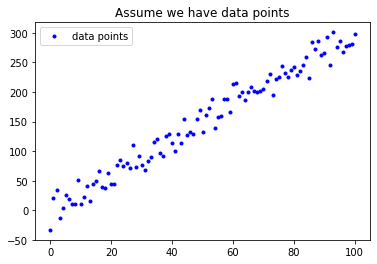

In [3]:
# 與範例相同, 不另外解說
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

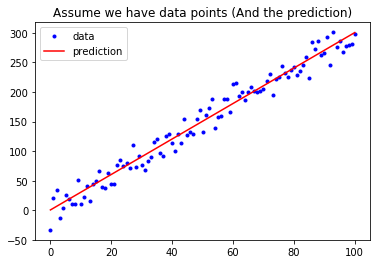

In [4]:
# 與範例相同, 不另外解說
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [7]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 239.310
The Mean absolute error is 12.940


# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

1. 你選的這組資料為何重要

我選擇RSNA Intracranial Hemorrhage Detection資料集，因為她是大腦顱內出血檢測的CT圖，對醫學界有巨大貢獻。

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

由北美放射學會（RSNA®）與美國神經放射學會和MD.ai成員合作提供的豐富圖像數據集來開發解決方案。
四個研究機構提供了大量經過身份驗證的CT研究，這些研究被組合起來創建了挑戰數據集。

3. 蒐集而來的資料型態為何

檔案說明
stage_2_train.csv-訓練集。包含Id和目標信息。
stage_2_sample_submission.csv-格式正確的示例提交文件。包含Id的測試集。

資料欄位
ID-圖片Id。每個Id對應於一個唯一的圖像，並且將包含一個下劃線。
標籤 - any所顯示圖像中是否存在該亞型出血（或的情況下為任何出血）的可能性。

4. 這組資料想解決的問題如何評估

提交使用加權的多標籤對數損失進行評估。每幅圖像的每種出血亞型都有自己的一行，並且您應該預測該出血亞型的可能性。還有一個any標籤，指示圖像中存在任何類型的出血。該any標籤比特定出血亞型的加權更高。

對於每個圖像Id，您必須提交一組預測概率（每個子類型單獨的一行）。然後，我們將每個預測概率與其真實標記的對數損失。最後，所有樣本的損失均取平均值。

為了避免對數函數的極值，預測概率與替換m a x （m i n （p ，1 − 10 ** −15），10 ** −15）


# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

想提升業績載客量一定要多，所以要取得何時何地需要被接送的人群多。

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

資料可以從縣市政府的消費群地區統計資料蒐集，或是各大車站人流量的數據統計，然後可以再實際探勘訪問統計在地車隊的接送量。

3. 蒐集而來的資料型態為何

蒐集出來的資料型態會是人群的數量，還有他們是否會被載，跟載的人通常是那些人。

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

做出資料分析跟解決分析後，可以依照不同載客地點的車站車隊比較業績。